In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc

Iteration 0, Cost: 0.6883627858464522
Iteration 100, Cost: 0.6467899994487492
Iteration 200, Cost: 0.6286311972962493
Iteration 300, Cost: 0.6113595799625164
Iteration 400, Cost: 0.5949304963644997
Iteration 500, Cost: 0.5793004013520541
Iteration 600, Cost: 0.5644270691586819
Iteration 700, Cost: 0.5502697576079771
Iteration 800, Cost: 0.5367893279479728
Iteration 900, Cost: 0.5239483257903363
Learned parameters: [-0.97819764  0.71955344 -0.2586442 ]


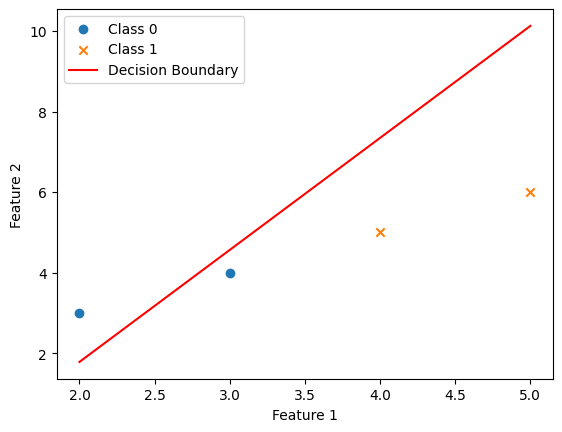

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(theta, X):
    return sigmoid(np.dot(X, theta))

def cost(X, y, theta):
    m = len(y)
    h = hypothesis(theta, X)
    # Logistic regression cost function
    J = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m
    return J

def gradient_descent(X, y, theta, alpha, num_iterations):
    m, n = X.shape
    for iteration in range(num_iterations):
        h = hypothesis(theta, X)
        # Gradient calculation
        delta = np.dot(X.T, (h - y)) / m
        # Update parameters using gradient descent
        theta -= alpha * delta

        # Print cost for every 100 iterations
        if iteration % 100 == 0:
            print(f'Iteration {iteration}, Cost: {cost(X, y, theta)}')

    return theta

def plot_decision_boundary(X, y, theta):
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], label='Class 0', marker='o')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], label='Class 1', marker='x')

    # Plot decision boundary
    x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    y_boundary = (-theta[0] - theta[1] * x_boundary) / theta[2]
    plt.plot(x_boundary, y_boundary, label='Decision Boundary', color='r')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Sample dataset
X = np.array([[1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6]])
y = np.array([0, 0, 1, 1])

# Initialize parameters
theta = np.zeros(X.shape[1])

# Learning rate and number of iterations
alpha = 0.01
num_iterations = 1000

# Run gradient descent
theta = gradient_descent(X, y, theta, alpha, num_iterations)

# Print the learned parameters
print(f'Learned parameters: {theta}')

# Plot decision boundary
plot_decision_boundary(X, y, theta)